<a href="https://colab.research.google.com/github/kenedy21/kenedy21/blob/ml_tutorial/ml_linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear** **Regression**

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [25]:
from sklearn.utils import DataConversionWarning
data = pd.read_csv('Advertising.csv')
datan = data.drop(columns = ['Unnamed: 0'] ,axis = 1)

In [26]:
datan.describe()
datan.shape
datan.columns


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

plot the data

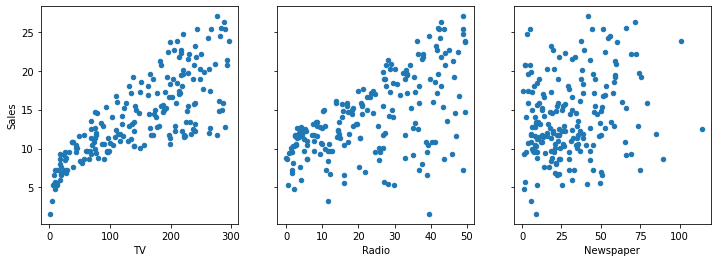

In [27]:
fig,axes = plt.subplots(1,3,sharey=True)
datan.plot(kind='scatter',x='TV',y='Sales',ax = axes[0],figsize=(12,4))
datan.plot(kind ='scatter',x='Radio',y ='Sales',ax = axes[1])
datan.plot(kind='scatter',x='Newspaper',y='Sales',ax = axes[2])




In [28]:
x = datan[['TV']]
y = datan.Sales

In [29]:
model = LinearRegression()
model.fit(x,y)


LinearRegression()

In [30]:
print(model.intercept_)
print(model.coef_)


7.032593549127695
[0.04753664]


In [31]:
x_new = pd.DataFrame({'TV': [datan.TV.min(),datan.TV.max()]})
x_new

,TV
0,0.7
1,296.4


In [32]:
preds = model.predict(x_new)
preds

array([ 7.0658692 , 21.12245377])

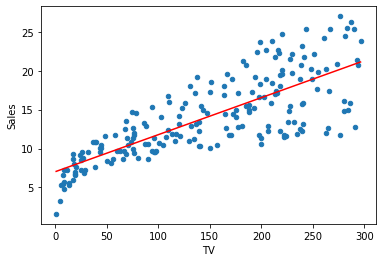

In [33]:
datan.plot(kind='scatter',x='TV',y='Sales')
plt.plot(x_new,preds,c='red')

In [34]:
import statsmodels.formula.api as smf
model1 = smf.ols(formula='Sales ~ TV',data=data).fit()

In [46]:
model1.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [36]:
model1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [37]:
X = datan[['TV', 'Radio', 'Newspaper']]
Y = datan.Sales


In [61]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,Y,test_size=0.2,random_state=42)
model3 = LinearRegression()
model3.fit(X,Y)

LinearRegression()

In [68]:
prediction = model3.predict(xtest)
#prediction
print(sqrt(mean_squared_error(ytest,prediction)))

1.7446869494731094


In [39]:
print(model3.intercept_)
print(model3.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [40]:
model4 = smf.ols(formula='Sales ~ TV + Radio + Newspaper',data = data).fit()

In [41]:
model4.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

In [43]:
model4.rsquared

0.8972106381789522

In [ ]:
model4.conf_int()
model4.summary()

In [58]:
import numpy as np
np.random.seed(344)
nums = np.random.rand(len(datan))

mask_urban = nums>0.7
mask_suburban = (nums>0.3) & (nums < 0.7)

In [59]:
datan['area'] = 'rural'
datan.loc[mask_suburban,'area'] = 'suburban'
datan.loc[mask_urban, 'area'] = 'urban'

In [69]:
datan.head(10)

,TV,Radio,Newspaper,Sales,area
0,230.1,37.8,69.2,22.1,suburban
1,44.5,39.3,45.1,10.4,urban
2,17.2,45.9,69.3,9.3,suburban
3,151.5,41.3,58.5,18.5,rural
4,180.8,10.8,58.4,12.9,rural
5,8.7,48.9,75.0,7.2,suburban
6,57.5,32.8,23.5,11.8,suburban
7,120.2,19.6,11.6,13.2,suburban
8,8.6,2.1,1.0,4.8,rural
9,199.8,2.6,21.2,10.6,rural


In [71]:
area_dummies = pd.get_dummies(datan.area,prefix='area').iloc[:,1:]
datan = pd.concat([datan,area_dummies],axis=1)

In [72]:
datan.head(10)

,TV,Radio,Newspaper,Sales,area,area_suburban,area_urban
0,230.1,37.8,69.2,22.1,suburban,1,0
1,44.5,39.3,45.1,10.4,urban,0,1
2,17.2,45.9,69.3,9.3,suburban,1,0
3,151.5,41.3,58.5,18.5,rural,0,0
4,180.8,10.8,58.4,12.9,rural,0,0
5,8.7,48.9,75.0,7.2,suburban,1,0
6,57.5,32.8,23.5,11.8,suburban,1,0
7,120.2,19.6,11.6,13.2,suburban,1,0
8,8.6,2.1,1.0,4.8,rural,0,0
9,199.8,2.6,21.2,10.6,rural,0,0


In [73]:
model5 = LinearRegression()
model5.fit(datan[['TV','Radio','Newspaper','area_suburban','area_urban']],datan.Sales)


LinearRegression()

In [74]:
model5.coef_

array([ 4.58140109e-02,  1.88478177e-01, -3.24219588e-04,  3.53605982e-01,
        2.57348633e-01])